In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time


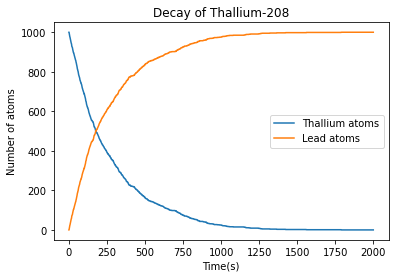

In [2]:
# Definition of the given data
tau_Tl = 3.052 #minutes
t_step = 1. #seconds
n_Tl = 1000
n_Pb = 0

# Decay function
def decay_prob(t, tau):
    return 1 - 2**(-t/tau)

# Define the probability with which a Talium atom decays
p_Tl = decay_prob(t_step,tau_Tl*60)

# Calculate the number of atoms of each element in each time step
T = np.arange(0.0, 2000, t_step)
Tl = []
Pb = []
for t in T:
    Tl.append(n_Tl)
    Pb.append(n_Pb)
    decay = 0
    for i in range(n_Tl):
        if npr.random() < p_Tl:
            decay += 1
    n_Tl -= decay
    n_Pb += decay

# Plot the decay
plt.plot(T,Tl, label = "Thallium atoms")
plt.plot(T,Pb, label = "Lead atoms")
plt.xlabel("Time(s)")
plt.ylabel("Number of atoms")
plt.title("Decay of Thallium-208")
plt.legend()
plt.show()

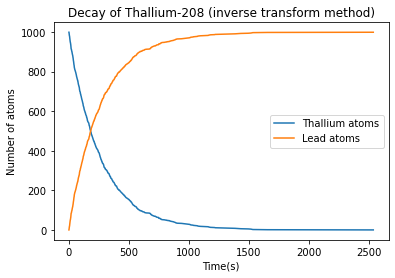

In [3]:
# Repeat the exercise by means of the inverse transform method

# Define the non-uniform probability distribution, cdf and inverse cdf
def decay_pdf(t, tau):
    return 2**(-t/tau)*np.log(2)/tau

# COmpute the integral to get cdf
def decay_cdf(t, tau):
    return 1 - 2**(-t/tau)

# Compute inverse of cdf (F(x) = u --> x = F^(-1)(u))
def decay_icdf(u, tau):
    return -tau*np.log(u)/np.log(2)

# Estimate the time at which each atom decays using the non-uniform pdf
uni_array = npr.rand(1000)
decay_times = decay_icdf(uni_array, tau_Tl*60)
decay_times_sorted = np.sort(decay_times)

# Plot
plt.plot(decay_times_sorted, np.arange(0,1000,1)[::-1], label = "Thallium atoms")
plt.plot(decay_times_sorted, np.arange(0,1000,1), label = "Lead atoms")
plt.xlabel("Time(s)")
plt.ylabel("Number of atoms")
plt.title("Decay of Thallium-208 (inverse transform method)")
plt.legend()
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Compute the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [4]:
from math import pi

# Definition of the given data
E = 7.7*1.6*10**(-13) #joules
Z = 79 #Gold
N = 1000000

a_0 = 5.29 * 10**(-11)  # meters
sigma = a_0/100

# beam
b = npr.multivariate_normal([0,0], np.array([[sigma**2, 0], [0, sigma**2]]), N)
b_distance = [np.sqrt(b[i,0]**2+b[i,1]**2) for i in range(N)]

# definition of the rule
def angle(Z,E,b):
    eps_0 = 8.85*10**(-12) #C^2/(Nm^2)
    e = 1.6*10**(-19) #C
    tan_halfangle = (Z*e**2)/(2*pi*eps_0*E*b)
    return np.arctan(tan_halfangle)*2

# Lets see what percentage of the particles are bounced back
bounced_back = 0
for beam in b_distance:
    if angle(Z,E,beam) > pi/2:
        bounced_back += 1

print("The number of alpha particles that bounce back is {}, which makes a {} % of the total.".format(bounced_back, np.round(bounced_back/N*100,2)))

The number of alpha particles that bounce back is 1627, which makes a 0.16 % of the total.


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [5]:
# Definition of the function
def f(x):
    return (np.sin(1/(x*(2-x))))**2

# Integral with hit/miss method
N=10000
I_hm = []
for n in range(100):
    count=0
    for i in range(N):
        x = 2*npr.random()
        y = np.random.random()
        if y < f(x): count += 1
    I_hm.append(2*count/N)
    
print("Integral with the hit/miss method: {} \u00B1 {}".format(np.mean(I_hm), np.std(I_hm)))

# Integral with the mean method
s = 0
F = []
for i in range(N):
    x = 2*npr.random()
    s += f(x)
    F.append(f(x))
I_mean = 2*s/N
I_mean_err = 2*np.std(F)/np.sqrt(N)
      
print("Integral with the mean method: {} \u00B1 {}".format(I_mean, I_mean_err))

Integral with the hit/miss method: 1.453246 ± 0.009182629470908647
Integral with the mean method: 1.4539235076001755 ± 0.005277928429258736


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere

In [8]:
# Define the function in 2D
def circle(x, y):
    if x**2 + y**2 <= 1:
        return 1
    else:
        return 0

# Integrate by hit/miss:
N=100000

count=0
for i in range(N):
    x = 2*npr.random() - 1
    y = 2*npr.random() - 1
    count += circle(x, y)
I = 4*count/N
print("Area of a circle of unit radius:", I)

# Generalize to a 10D sphere:
def sphere_nd(X):
    squares = X**2
    if squares.sum() <= 1:
        return 1
    else:
        return 0

count=0
n = 10
for i in range(N):
    X = 2*npr.rand(n) - 1
    count += sphere_nd(X)
I_n = 2**n*count/N
print("Volume of a {}-D unit sphere: {}".format(n, I_n))

Area of a circle of unit radius: 3.1288
Volume of a 10-D unit sphere: 2.59072


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [7]:
# Define the function
def f(x):
    return x**(-1/2)/(np.exp(x)+1)

# Define the weight function
def w(x):
    return x**(-1/2)

# Calculate the integral
s = 0
N = 100000
for i in range(N):
    x = (npr.random())**2
    s += f(x)/w(x)
I = 2*s/N
print("Integral with the sampling method:", np.round(I,2))

Integral with the sampling method: 0.84
